In [1]:
import gym
import gymnasium as gym
import xmagical
import warnings

warnings.filterwarnings("ignore")

Loading chipmunk for Linux (64bit) [/home/m_bobrin/anaconda3/envs/cilot/lib/python3.9/site-packages/pymunk/libchipmunk.so]


In [2]:
import numpy as np
import sys
sys.path.append("../..")
from icvf_dataset import Dataset

fname = "/home/m_bobrin/CILOT-Research/datasets/x_magical/xmagical_replay_icvf/gripper_train.npz"
buffer = np.load(fname)
keys = buffer.keys()
ans = {k: buffer[k] for k in keys}
Dataset(ans)

FrozenDict({
    observations: array([[[[250, 190, 209],
             [250, 190, 209],
             [250, 190, 209],
             ...,
             [250, 190, 209],
             [250, 190, 209],
             [250, 190, 209]],
    
            [[250, 190, 209],
             [250, 190, 209],
             [250, 190, 209],
             ...,
             [250, 190, 209],
             [250, 190, 209],
             [250, 190, 209]],
    
            [[250, 190, 209],
             [250, 190, 209],
             [250, 190, 209],
             ...,
             [250, 190, 209],
             [250, 190, 209],
             [250, 190, 209]],
    
            ...,
    
            [[214, 214, 219],
             [245, 245, 247],
             [255, 255, 255],
             ...,
             [255, 255, 255],
             [255, 255, 255],
             [215, 216, 221]],
    
            [[214, 214, 219],
             [245, 245, 247],
             [255, 255, 255],
             ...,
             [255, 255, 255

In [2]:
import sys
sys.path.append("../..")
from environments.utils import get_dataset

test_ds = get_dataset("gripper")['observations']

In [3]:
get_dataset("gripper")['actions'].shape

(170926, 3)

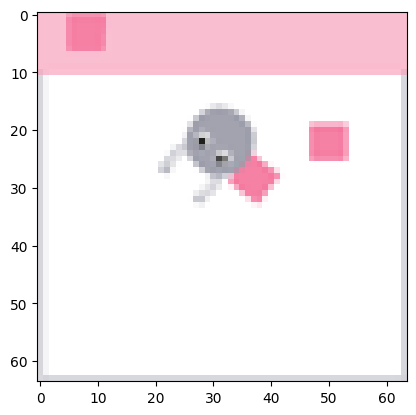

In [4]:
import matplotlib.pyplot as plt

plt.imshow(test_ds[30])

In [5]:
xmagical.register_envs()

False

In [7]:
xmagical.ALL_REGISTERED_ENVS

['SweepToTop-Gripper-Pixels-Allo-Demo-v0',
 'SweepToTop-Gripper-Pixels-Ego-Demo-v0',
 'SweepToTop-Gripper-State-Allo-Demo-v0',
 'SweepToTop-Gripper-State-Ego-Demo-v0',
 'SweepToTop-Gripper-Pixels-Allo-TestLayout-v0',
 'SweepToTop-Gripper-Pixels-Ego-TestLayout-v0',
 'SweepToTop-Gripper-State-Allo-TestLayout-v0',
 'SweepToTop-Gripper-State-Ego-TestLayout-v0',
 'SweepToTop-Gripper-Pixels-Allo-TestShape-v0',
 'SweepToTop-Gripper-Pixels-Ego-TestShape-v0',
 'SweepToTop-Gripper-State-Allo-TestShape-v0',
 'SweepToTop-Gripper-State-Ego-TestShape-v0',
 'SweepToTop-Gripper-Pixels-Allo-TestColor-v0',
 'SweepToTop-Gripper-Pixels-Ego-TestColor-v0',
 'SweepToTop-Gripper-State-Allo-TestColor-v0',
 'SweepToTop-Gripper-State-Ego-TestColor-v0',
 'SweepToTop-Gripper-Pixels-Allo-TestDynamics-v0',
 'SweepToTop-Gripper-Pixels-Ego-TestDynamics-v0',
 'SweepToTop-Gripper-State-Allo-TestDynamics-v0',
 'SweepToTop-Gripper-State-Ego-TestDynamics-v0',
 'SweepToTop-Gripper-Pixels-Allo-TestAll-v0',
 'SweepToTop-Gripp

In [8]:
env = gym.make('SweepToTop-Gripper-State-Allo-Demo-v0', disable_env_checker =True) #
obs = env.reset()


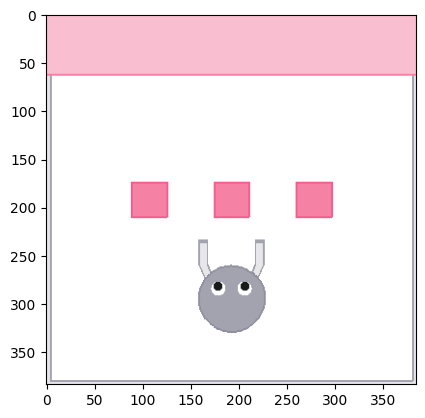

In [10]:
import matplotlib.pyplot as plt

plt.imshow(env.render("rgb_array"))

In [11]:
import sys
sys.path.append("/home/m_bobrin/CILOT-Research")

from video import VideoRecorder

vid = VideoRecorder("/home/m_bobrin/CILOT-Research/research/noteboooks")
vid.init(enabled=True)

In [12]:
import numpy as np
import json

actions_gripper = np.asarray(json.load(open('/home/m_bobrin/CILOT-Research/datasets/x_magical/xmagical_dataset/train/gripper/0/actions.json', 'r')))
actions_gripper

array([[ 0.97258198, -0.60110331, -0.30938908],
       [ 0.97200912,  0.55419141, -0.35179466],
       [ 0.98437846,  0.15855591, -0.44128591],
       [ 0.95068842, -0.97185987, -0.73531085],
       [ 0.75648201, -0.94016534, -0.85736662],
       [ 0.93502533,  0.57579017,  0.53250647],
       [ 0.98876953,  0.41081449,  0.84890163],
       [ 0.97733909, -0.32370791,  0.92243659],
       [ 0.95169902,  0.73345637,  0.92991698],
       [ 0.89064509,  0.76767313,  0.85871649],
       [ 0.85955715,  0.32179666,  0.84562451],
       [ 0.87261033, -0.6359731 ,  0.94356948],
       [ 0.89014572,  0.84921932,  0.91626036],
       [ 0.92445815,  0.9550128 ,  0.88437271],
       [ 0.98881435,  0.29741821,  0.74263924],
       [ 0.99780321, -0.97341883,  0.82902366],
       [ 0.99787092, -0.93360198,  0.77899015],
       [ 0.89802969, -0.71928513, -0.27486947],
       [ 0.17151548, -0.86451232, -0.7893284 ],
       [ 0.644638  , -0.91085047, -0.84281343],
       [ 0.42606002, -0.90601051, -0.899

In [13]:
env.reset()
i = 0
for en in range(50):
    #observation, done = env.reset(), False
    observation, _, done, info = env.step(actions_gripper[i])
    i += 1
    vid.record(env)
    if done:
        env.reset()
        i = 0
        done = False

In [14]:
from gymnasium.utils.save_video import save_video

save_video(
         vid.frames,
         "videos",
         fps=10,
      )

Moviepy - Building video /home/m_bobrin/CILOT-Research/research/noteboooks/videos/rl-video-episode-0.mp4.
Moviepy - Writing video /home/m_bobrin/CILOT-Research/research/noteboooks/videos/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /home/m_bobrin/CILOT-Research/research/noteboooks/videos/rl-video-episode-0.mp4
